3. Standardize all columns.
4. Plot the data, using dimensionality reduction (principal component analysis).
5. Visualize clustering with two and seven clusters.
6. Create a plot of the sum of squared errors and look for an elbow.

In [41]:
import pandas as pd

df = pd.read_csv("data_science/four_cols.csv")

In [42]:
df.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [43]:
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()
    zcols.append('z_' + col)

In [44]:
zcols

['z_income', 'z_age', 'z_days_since_purchase', 'z_annual_spend']

In [46]:
df.head()

,income,age,days_since_purchase,annual_spend,z_income,z_age,z_days_since_purchase,z_annual_spend
0,37453,48,504,4441,-0.889981,0.604558,0.752880,0.062245
1,50775,50,566,4239,-0.552817,0.788959,1.305708,-0.058910
2,71047,41,326,5834,-0.039758,-0.040845,-0.834271,0.897732
3,52239,52,259,5456,-0.515765,0.973360,-1.431681,0.671017
4,112343,27,279,1749,1.005394,-1.331651,-1.253350,-1.552352


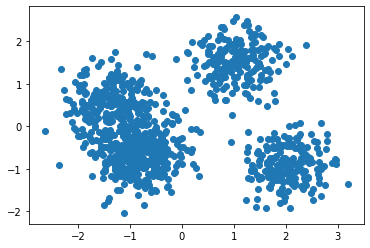

In [47]:
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

pca = decomposition.PCA(n_components=2)
df['pc1'], df['pc2'] = zip(*pca.fit_transform(df[zcols]))

plt.scatter(df['pc1'], df['pc2'])
plt.show()

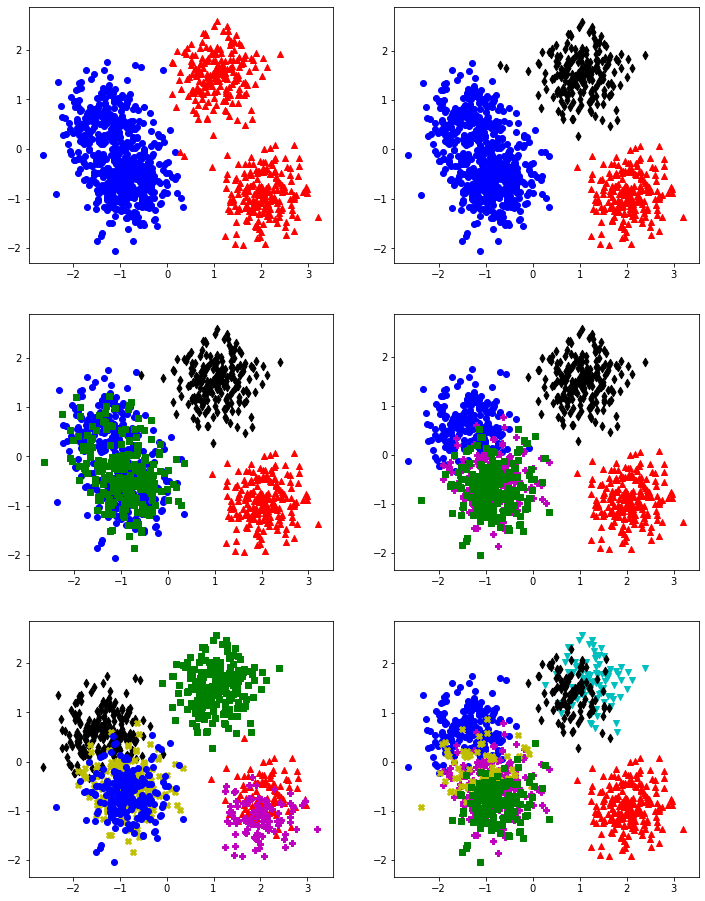

In [48]:
from sklearn import cluster

colors = ['r', 'b', 'k', 'g', 'm', 'y', 'c']
markers = ['^', 'o', 'd', 's', 'P', 'X', 'v']

plt.figure(figsize=(12,16))

for n in range(2,8):
    model = cluster.KMeans(n_clusters=n, random_state=10)
    df['cluster'] = model.fit_predict(df[zcols])

    plt.subplot(3, 2, n-1)
    for c in df['cluster'].unique():
        d = df[df['cluster'] == c]
        plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])    

plt.show()

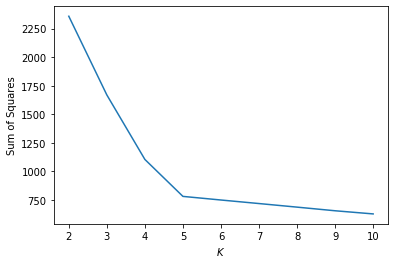

In [50]:
import numpy as np

ss = []
krange = list(range(2,11))
X = df[zcols].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=10)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[cluster_assignments]) ** 2))
    
plt.plot(krange, ss)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

In [51]:
df[zcols]

,z_income,z_age,z_days_since_purchase,z_annual_spend
0,-0.889981,0.604558,0.752880,0.062245
1,-0.552817,0.788959,1.305708,-0.058910
2,-0.039758,-0.040845,-0.834271,0.897732
3,-0.515765,0.973360,-1.431681,0.671017
4,1.005394,-1.331651,-1.253350,-1.552352
...,...,...,...,...
995,-0.864191,1.249961,-1.244433,0.512077
996,-1.739116,-0.962849,0.093053,-0.600508
997,0.246738,-0.040845,0.467550,1.210815
998,0.035106,1.249961,0.672631,0.897133
